<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/313_GeneticAlgorithm_Camouflage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/shReZko1xns



#Understanding the evolutionary part of the Genetic Algorithms <br>
Genetic Algorithms (GAs) are inspired by the process of natural selection and evolution found in nature. GAs are a type of optimization technique that imitates the process of evolution and natural selection. They operate by creating a population of candidate solutions to a problem, and then repeatedly iterating through the following steps: selection, crossover, and mutation.
<p>
Read my blog on this topic here:
https://www.linkedin.com/pulse/genetic-algorithms-optimization-problems-sreenivas-bhattiprolu

The first part of the code below implements a genetic algorithm simulation to find the best RGB values that match a target RGB value. It involves the following 3 steps:
<br>
1. calc_fitness: calculates the mean absolute difference between an input RGB chromosome and the target RGB values.
2.evolve_population: evolves a population of chromosomes by selecting the best chromosomes (elites), mating them to create offspring, and applying random mutations to the offspring.
3. simulate: runs the genetic algorithm simulation by initializing a population of random RGB values, evolving the population over a specified number of generations, and returning the best chromosome found.

The target RGB values are passed as input to the simulate function, and the simulation runs for 50 generations with a population size of 100, mutation rate of 0.01, and 10% of the population being selected as elites. The RGB values and fitness of the best individual in each generation are printed. The final output is the best chromosome found, which is the individual with the minimum fitness value (the closest match to the target RGB).

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#A quick summary of our fitness function - mean absolute difference between two arrays
#Calculate absolute value element wise and then mean.
print(np.mean(np.abs(np.array([50, 50, 10]) - np.array([255, 0, 0]))))

88.33333333333333


Define the necessary helper functions.


In [ ]:
def calc_fitness(chromosome, target_rgb):
    """
    Calculate the fitness of a given chromosome.

    Parameters:
        chromosome (np.ndarray): An array representing the chromosome.
        target_rgb (np.ndarray): The target RGB values.

    Returns:
        float: The mean absolute difference between the chromosome and target RGB values.
    """
    return np.mean(np.abs(chromosome - target_rgb))

In [ ]:
def evolve_population(population, target_rgb, mutation_rate, elite_ratio):
    """
    Evolve a population of chromosomes.

    Parameters:
        population (List[np.ndarray]): A list of arrays representing the chromosomes in the population.
        target_rgb (np.ndarray): The target RGB values.
        mutation_rate (float): The probability of a chromosome mutating.
        elite_ratio (float): The ratio of chromosomes to be selected as elites.

    Returns:
        List[np.ndarray]: The evolved population of chromosomes.
    """
    # Calculate fitness values for each chromosome in the population
    fitness_values = [calc_fitness(c, target_rgb) for c in population]

    # Select the chromosomes with the best fitness values as elites
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]
    elites = [population[i] for i in elite_index]

    # Create a new population by mating the elites
    new_population = []
    while len(new_population) < len(population) - len(elites):
        # Select two parents randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Create a child chromosome by combining the genes of the two parents
        child = np.zeros(parent1.shape)
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child[i] = parent1[i]
            else:
                child[i] = parent2[i]

            # Mutate the child chromosome with a probability determined by mutation_rate
            if random.random() < mutation_rate:
                child[i] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

    # Return the evolved population
    return elites + new_population

In [ ]:
def simulate(size, target_rgb, generations, mutation_rate, elite_ratio):
    """
    Simulate the evolution of a population of chromosomes.

    Parameters:
        size (int): The size of the population.
        target_rgb (np.ndarray): The target RGB values.
        generations (int): The number of generations to evolve the population.
        mutation_rate (float): The probability of a chromosome mutating.
        elite_ratio (float): The ratio of chromosomes to be selected as elites.

    Returns:
        np.ndarray: The best chromosome found.
    """
    # Initialize the population with random RGB values
    population = [np.random.randint(0, 256, size=(3,)) for _ in range(size)]

    # Evolve the population over the specified number of generations
    for i in range(generations):
        # Evolve the population by selecting elites, mutating, and recombining
        population = evolve_population(population, target_rgb, mutation_rate, elite_ratio)

        # Get the individual with the best fitness (closest to target RGB)
        best_fit = min(population, key=lambda c: calc_fitness(c, target_rgb))

        # Print the generation number and the RGB values and fitness of the best individual
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_rgb)}, RGB values {best_fit}')

    # Return the individual with the minimum fitness value
    return min(population, key=lambda c: calc_fitness(c, target_rgb))

In [ ]:
target_rgb = np.array([255, 255, 0])
best_camouflage = simulate(100, target_rgb, 50, 0.01, 0.1)

print("Target is %s and the best campuflage is %s ." % (target_rgb, best_camouflage))

Generation 0: Best fitness 11.0, RGB values [237. 251.  11.]
Generation 1: Best fitness 10.333333333333334, RGB values [239. 251.  11.]
Generation 2: Best fitness 10.333333333333334, RGB values [239. 251.  11.]
Generation 3: Best fitness 7.333333333333333, RGB values [248. 251.  11.]
Generation 4: Best fitness 7.333333333333333, RGB values [248. 251.  11.]
Generation 5: Best fitness 7.333333333333333, RGB values [248. 251.  11.]
Generation 6: Best fitness 7.333333333333333, RGB values [248. 251.  11.]
Generation 7: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 8: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 9: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 10: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 11: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 12: Best fitness 5.333333333333333, RGB values [254. 251.  11.]
Generation 13: Best fitness 5.333333333333333,

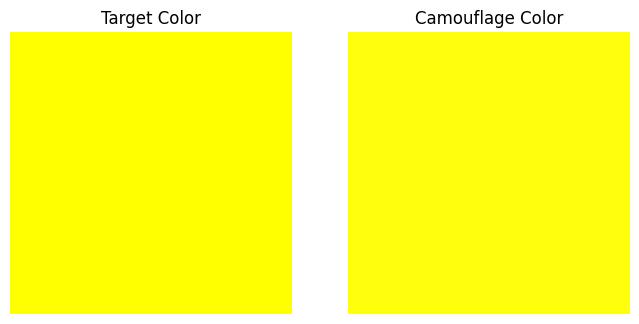

In [ ]:
# Create a figure and axis to plot the RGB values
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot each RGB value in its own axis
ax[0].imshow(np.reshape(target_rgb/255, (1, 1, 3)))
ax[1].imshow(np.reshape(best_camouflage/255, (1, 1, 3)))

# Remove the axis labels and grid
ax[0].axis("off")
ax[1].axis("off")

#Add titles
ax[0].set_title("Target Color")
ax[1].set_title("Camouflage Color")
# Show the plot
plt.show()

#Now, let us extend the above example to a 2D image <br>
The following code is similar to the previous code in terms of the basic structure and the purpose of the code, which is to simulate an evolutionary process except here we are working with 2-dimensional images rather than a single RGB value. This helps us visualize the evolution process.  
<p>
We will pick a specific color as our target color, for example, yellow with RGB = [222, 165, 33] and watch the random pixels evolve into this color.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def calc_fitness(chromosome, target_grid):
    """
    Calculates the fitness of a chromosome by comparing it to the target grid.

    Parameters:
        chromosome (np.array): The chromosome to calculate the fitness for.
        target_grid (np.array): The target grid to compare the chromosome to.

    Returns:
        float: The fitness of the chromosome.
    """
    return np.mean(np.abs(chromosome - target_grid))

In [ ]:

def evolve_population(population, target_grid, mutation_rate, elite_ratio):
    """
    Evolves the population by selecting the best chromosomes (elites), breeding them, and mutating the offspring.

    Parameters:
        population (list of np.array): The current population of chromosomes.
        target_grid (np.array): The target grid to compare the chromosomes to.
        mutation_rate (float): The rate of mutation for the offspring.
        elite_ratio (float): The ratio of the population that should be considered as elites.

    Returns:
        list of np.array: The evolved population of chromosomes.
    """
    # Calculate fitness values for each chromosome in the population
    fitness_values = [calc_fitness(c, target_grid) for c in population]

    # Determine the indices of the best chromosomes (elites)
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]

    # Select the best chromosomes (elites) from the population
    elites = [population[i] for i in elite_index]

    # Initialize the new population
    new_population = []

    # Create new offspring by breeding the elites
    while len(new_population) < len(population) - len(elites):
        # Select two parent chromosomes randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Initialize the child chromosome
        child = np.zeros(parent1.shape)

        # Loop through the elements of the parent chromosomes
        for i in range(len(parent1)):
            for j in range(len(parent1[i])):
                for k in range(len(parent1[i][j])):
                    # Randomly inherit the element from either parent
                    if random.random() < 0.5:
                        child[i][j][k] = parent1[i][j][k]
                    else:
                        child[i][j][k] = parent2[i][j][k]

                    # Mutate the element with a certain probability
                    if random.random() < mutation_rate:
                        child[i][j][k] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

    # Combine the elites and the offspring to form the evolved population
    return elites + new_population


In [ ]:

images =[]
def simulate(size, target_grid, generations, mutation_rate, elite_ratio):
    """
    This function simulates the evolutionary process to generate new images.

    Parameters:
    size (int) : The size of the population.
    target_grid (numpy array) : The target image for the evolutionary process.
    generations (int) : The number of generations to run the simulation for.
    mutation_rate (float) : The rate of mutation of the images in the population.
    elite_ratio (float) : The ratio of the population that will be considered as elites.

    Returns:
    (tuple) : A tuple of the best image generated by the simulation and a list of all images generated in the simulation.
    """
    # The size of each image in the population
    grid_size = (16, 16, 3)
    # initialize the population with random values
    population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]


    for i in range(generations):
      # evolve the population for each generation
        population = evolve_population(population, target_grid, mutation_rate, elite_ratio)
         # find the chromosome with the best fitness value
        best_fit = min(population, key=lambda c: calc_fitness(c, target_grid))
        # print the generation number and best fitness value
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_grid)}')

        # store the generated image
        images.append(best_fit.astype(np.uint8))

        # commented out code for displaying or saving images
        #fig, ax = plt.subplots()
        #ax.imshow(best_fit.astype(np.uint8))
        #plt.title(f'Generation {i}')
        #fig.tight_layout()
        #plt.show()
        # filename = f'camo_images/yellow/gen_{i}.png'
        # plt.savefig(filename)

    # Return the best fit image and the list of all images
    return min(population, key=lambda c: calc_fitness(c, target_grid)), images

In [ ]:
target_grid = np.zeros((16, 16, 3), dtype=np.uint8)
#Yellow color from African Savannah [222, 165, 33]
# Green grass [0, 154, 23]
target_grid[:] = [222, 165, 33]

pop_size = 100
num_generations = 50
mut_rate = 0.01
elite_ratio = 0.1
best_camouflage, images = simulate(pop_size, target_grid, num_generations, mut_rate, elite_ratio)



Generation 0: Best fitness 81.09375
Generation 1: Best fitness 79.03515625
Generation 2: Best fitness 76.32291666666667
Generation 3: Best fitness 73.9453125
Generation 4: Best fitness 72.34244791666667
Generation 5: Best fitness 70.33984375
Generation 6: Best fitness 69.05208333333333
Generation 7: Best fitness 67.80989583333333
Generation 8: Best fitness 66.32291666666667
Generation 9: Best fitness 65.07421875
Generation 10: Best fitness 63.608072916666664
Generation 11: Best fitness 62.8828125
Generation 12: Best fitness 62.338541666666664
Generation 13: Best fitness 61.1953125
Generation 14: Best fitness 60.399739583333336
Generation 15: Best fitness 59.60546875
Generation 16: Best fitness 59.057291666666664
Generation 17: Best fitness 57.91796875
Generation 18: Best fitness 57.016927083333336
Generation 19: Best fitness 56.661458333333336
Generation 20: Best fitness 55.3359375
Generation 21: Best fitness 54.890625
Generation 22: Best fitness 54.19921875
Generation 23: Best fitness

Let us plot images in a grid to visualize the evolution

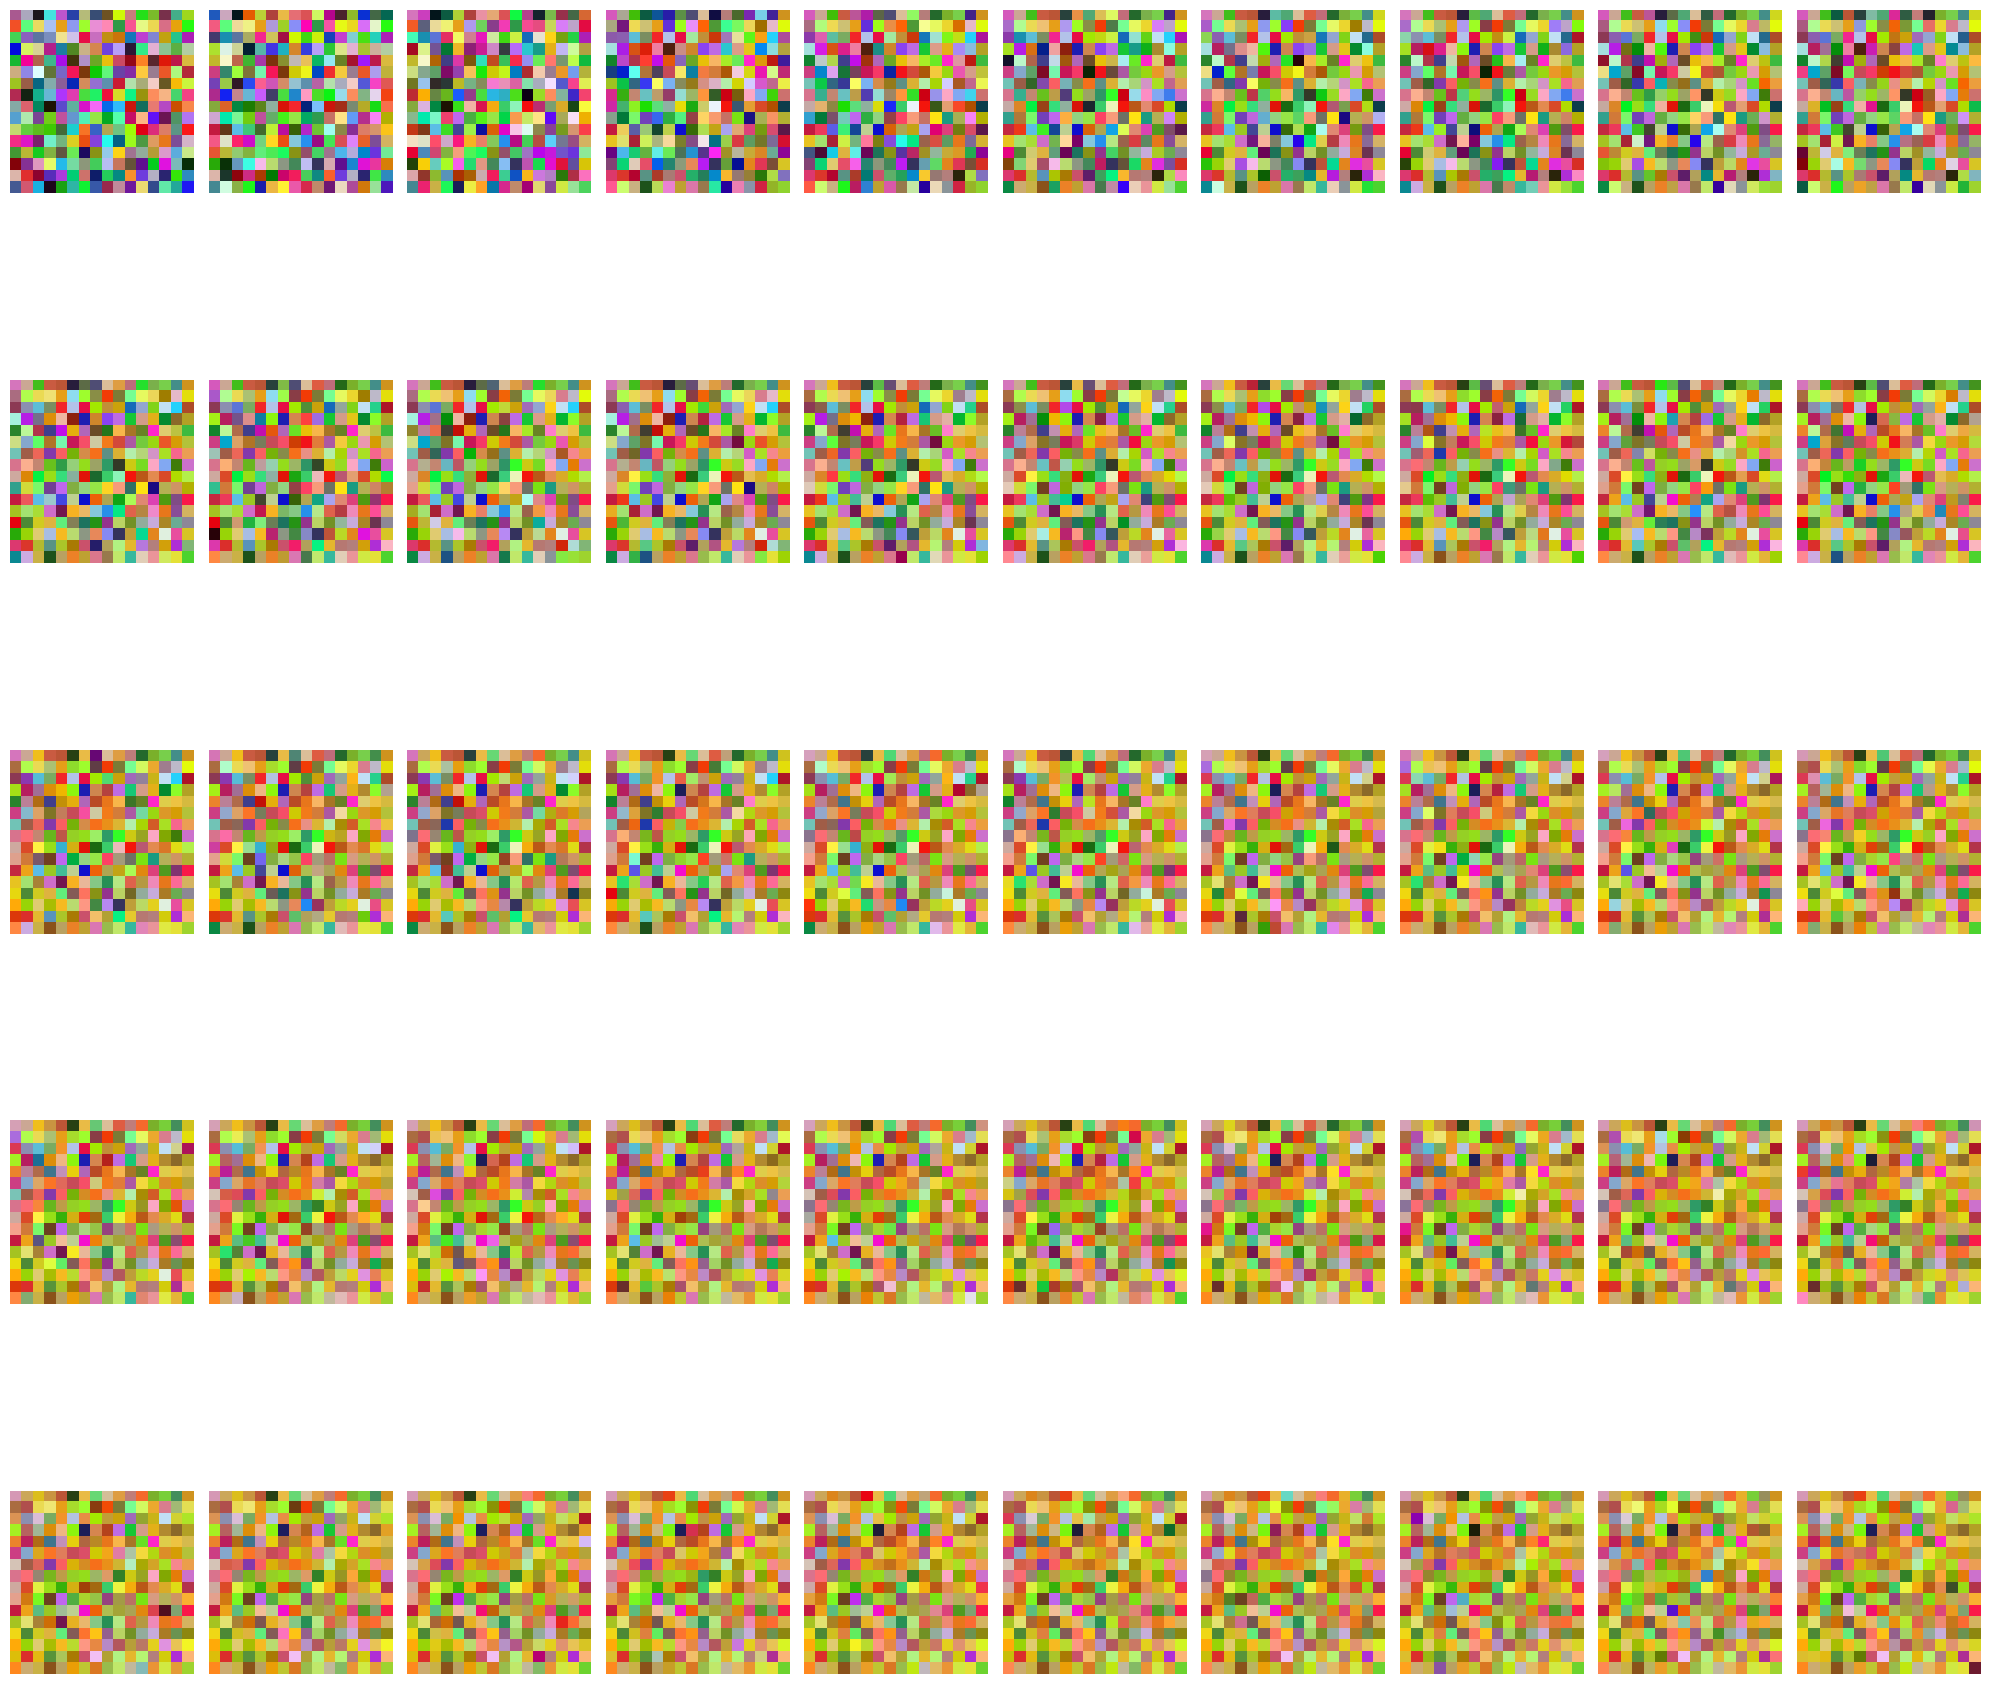

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Function to display a grid of images
def display_images(images, num_images=50, rows=10, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.ravel()):
        if i < num_images:
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

# Plot images:

display_images(images, rows=5, cols=10)
